<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Walkthrough of Standard EDA Procedure

_Authors: Kiefer Katovich (SF)_

---

This lesson uses a boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

Note: this lesson is strictly exploratory. We will not be formulating any hypotheses about the data or testing them. In many cases you may have formulated a hypothesis before even looking at your data, which could considerably affect your focus and choices in what to investigate.


### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Initial examination](#header)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Plot all variables together](#plot_all)
- [Standardization of variables](#standardization)
- [Plot the standardized variables together](#plot_all_rescaled)
- [Look at the covariance or correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries. They are typically found with datasets you might find online in a separate file.


**Load packages:**

In [12]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [13]:
boston_file = pd.DataFrame.from_csv('/Users/Mahendra/desktop/GA/hw/3.2.1_eda-basic_eda_walkthrough-lesson/datasets/housing.csv')

In [14]:
# A:
boston_file

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,"6,0821",5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,"6,5921",5,311,15.2,386.71,17.10,18.9


<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [15]:
# Print out the first 8 rows:
boston_file.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,396.90,19.15,27.1


In [16]:
# Look at the dtypes of the columns:
boston_file.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS         object
RAD         object
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<a id='drop'></a>

### 2. Drop unwanted columns

---

There is a column labeled `Unnamed: 0` which appears to simply number the rows. We already have the number id of the rows in the DataFrame's index and so we don't need this column.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [11]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
boston_file.drop('',axis=1).head(20)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0.458,6.430,58.7,"6,0622",3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0.524,6.012,66.6,"5,5605",5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0.524,6.172,96.1,"5,9505",5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0.524,5.631,100.0,"6,0821",5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0.524,6.004,85.9,"6,5921",5,311,15.2,386.71,17.10,18.9


In [7]:
# Remove the unneccesary column:


<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `dtypes` attribute that two of the columns were of type "object", indicating that they were string. However, we know from the data description above (and we can infer from the header of the data) that `DIS` and `RAD` should in fact be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**3.A What is causing the `DIS` column to be encoded as a string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: The `.map()` built-in function on a column will apply a function to each element of the column.*

In [18]:
# A:
boston_file.DIS.map(lambda x: float(x.replace(',','.')))

1      4.0900
2      4.9671
3      4.9671
4      6.0622
5      6.0622
6      6.0622
7      5.5605
8      5.9505
9      6.0821
10     6.5921
11     6.3467
12     6.2267
13     5.4509
14     4.7075
15     4.4619
16     4.4986
17     4.4986
18     4.2579
19     3.7965
20     3.7965
21     3.7979
22     4.0123
23     3.9769
24     4.0952
25     4.3996
26     4.4546
27     4.6820
28     4.4534
29     4.4547
30     4.2390
        ...  
477    2.3053
478    2.1007
479    2.1705
480    1.9512
481    3.4242
482    3.3317
483    3.4106
484    4.0983
485    3.7240
486    3.9917
487    3.5459
488    3.1523
489    1.8209
490    1.7554
491    1.8226
492    1.8681
493    2.1099
494    2.3817
495    2.3817
496    2.7986
497    2.7986
498    2.8927
499    2.4091
500    2.3999
501    2.4982
502    2.4786
503    2.2875
504    2.1675
505    2.3889
506    2.5050
Name: DIS, dtype: float64

**3.B What is causing the `RAD` column to be encoded as string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: You can put `np.nan` values in place of corrupted observations, which are numeric "Null" values.*

In [19]:
# A:
boston_file.RAD.unique()

array(['1', '2', '3', '5', '4', '?', '8', '6', '7', '24'], dtype=object)

In [20]:
boston_file.RAD.map(lambda x: x.replace('?','Nan'))

1        1
2        2
3        2
4        3
5        3
6        3
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       4
15       4
16       4
17     Nan
18       4
19       4
20       4
21       4
22     Nan
23       4
24       4
25       4
26       4
27       4
28       4
29       4
30       4
      ... 
477     24
478     24
479     24
480     24
481     24
482     24
483     24
484     24
485     24
486     24
487     24
488     24
489      4
490      4
491      4
492      4
493      4
494      6
495      6
496      6
497      6
498      6
499      6
500    Nan
501      6
502    Nan
503      1
504      1
505      1
506      1
Name: RAD, dtype: object

<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [22]:
# A:
boston_file.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have null values for you.

In [24]:
# A:
boston_file.dropna(inplace=True)
boston_file.shape

(506, 14)

<a id='rename'></a>

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.

Here are the column names and their descriptions again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [26]:
# A:
boston_file.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [31]:
boston_file.rename(columns={
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'B':'black_stat',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }, inplace=True)

<a id='describe'></a>

### 6. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [32]:
# A:
boston_file.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.
    

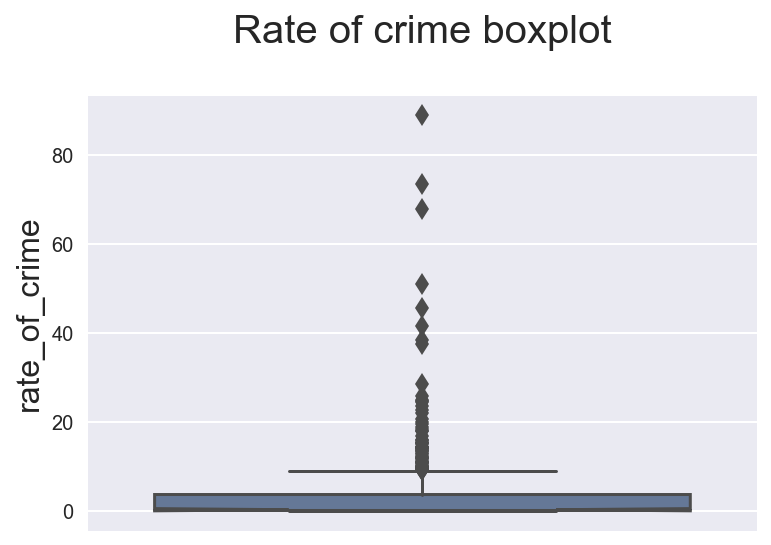

In [33]:
# rate of crime
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston_file.rate_of_crime, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('rate_of_crime', fontsize=16)
ax.set_title('Rate of crime boxplot\n', fontsize=20)

plt.show()

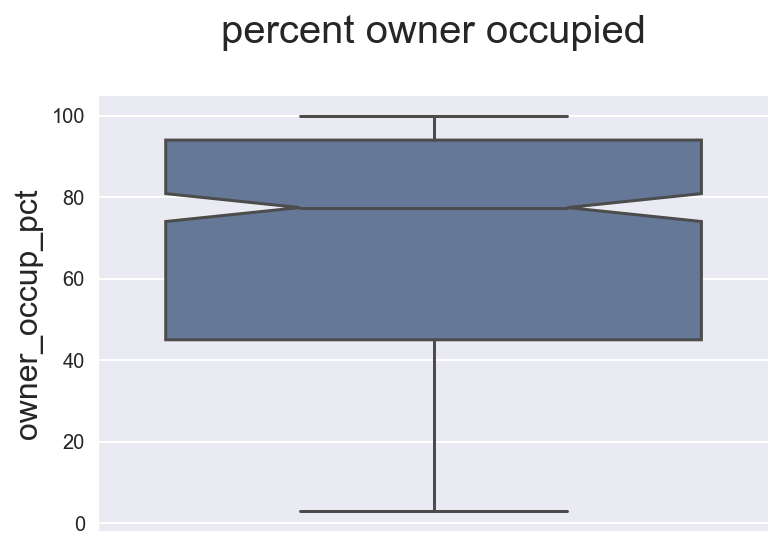

In [34]:
# percent owner occupied
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston_file.owner_occup_pct, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('owner_occup_pct', fontsize=16)
ax.set_title('percent owner occupied\n', fontsize=20)

plt.show()


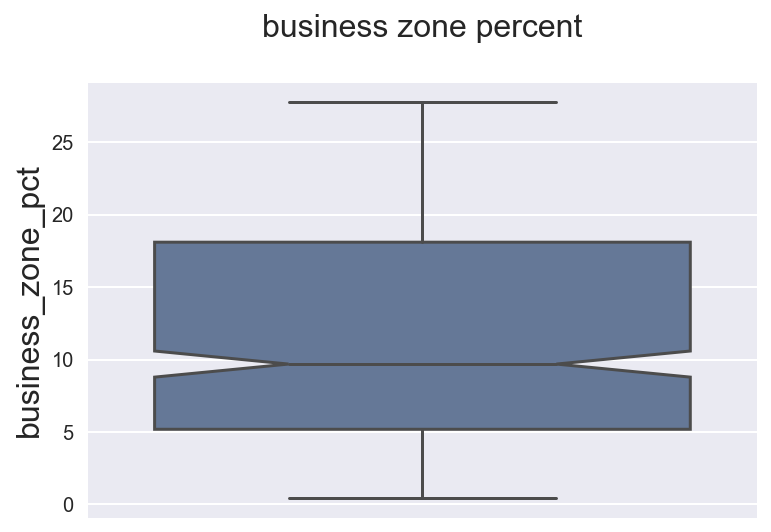

In [40]:
# business zone percent
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
ax=sns.boxplot(boston_file.business_zone_pct, orient='v',
              fliersize=8,linewidth=1.5,notch=True,
              saturation=0.5,ax=ax)
ax.set_ylabel('business_zone_pct', fontsize=16)
ax.set_title('business zone percent\n', fontsize=16)
plt.show()

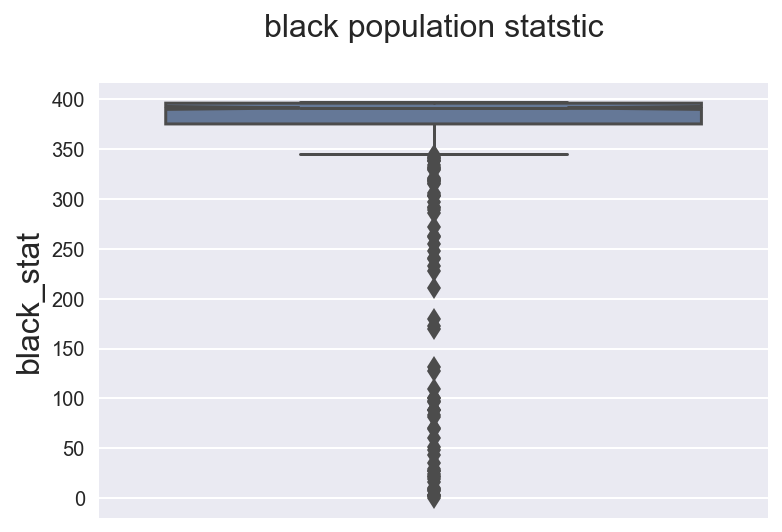

In [43]:
# black population statistic
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
ax=sns.boxplot(boston_file.black_stat, orient='v',
              fliersize=8,linewidth=1.5,notch=True,
              saturation=0.5,ax=ax)
ax.set_ylabel('black_stat', fontsize=16)
ax.set_title('black population statstic\n', fontsize=16)
plt.show()

<a id='plot_all'></a>

### 8. Plot all the variables on boxplots together.

---

Plot all the variables using using a horizontal boxplot with seaborn. What is wrong with this plot, if anything?

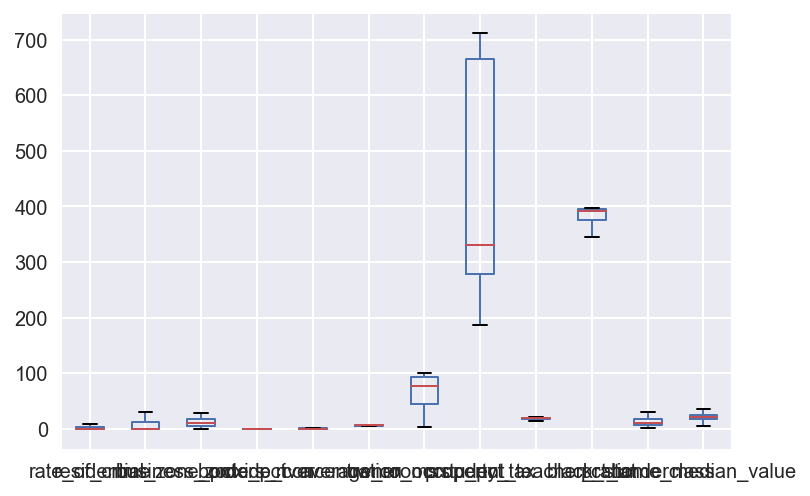

In [41]:
# A:
boston_file.plot.box()


<a id='standardization'></a>

### 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.

**9.A Pull out rate of crime and plot the distribution.**

Also print out the mean and standard deviation of the original variable.

In [46]:
# A:
crime=boston_file.rate_of_crime
crime_mean=np.mean(crime)
crime_std=np.std(crime)
print crime_mean,crime_std

3.61352355731 8.5930413513


**9.B Standardize the rate_of_crime variable. Notice the new mean is centered at 0.**

In [47]:
# A:
stand_crime=(crime-crime_mean)/crime_std
print np.mean(stand_crime), np.std(stand_crime)

-8.78743718107e-17 1.0


**9.C Plot the original and standardized rate of crime. Notice that nothing changes about the distribution except for the location and the scale.**

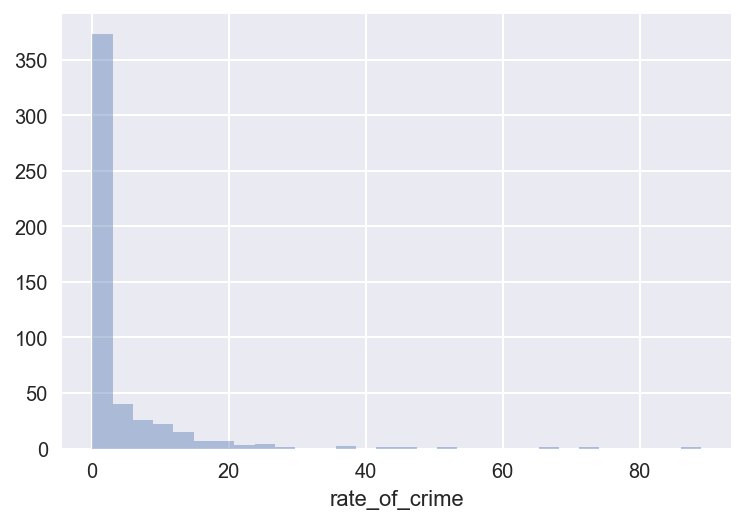

In [49]:
# A:
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
ax=sns.distplot(crime,bins=30,kde=False)
plt.show()

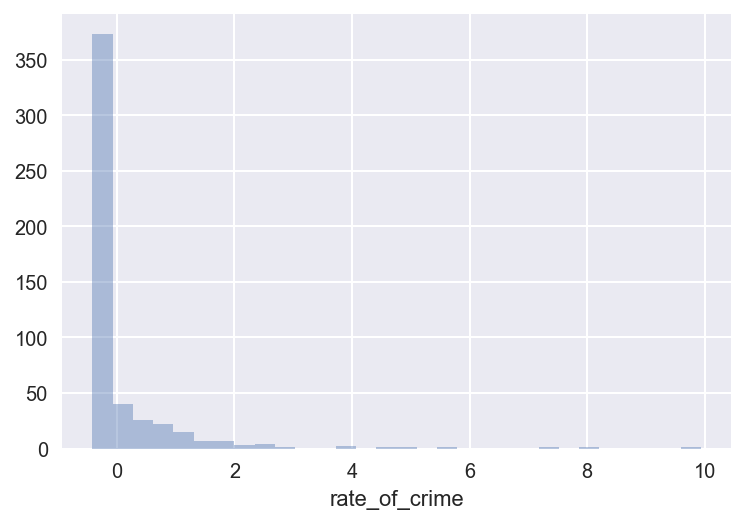

In [51]:
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
ax=sns.distplot(stand_crime,bins=30,kde=False)
plt.show()


<a id='plot_all_rescaled'></a>

### 10. Standardize all of the columns and re-create the boxplot

---

Pandas DataFrames make it extremely easy to standardize the columns all at once. You can standardize the data like so:

```python
boston_norm = (boston - boston.mean()) / boston.std()
```

Create a standardized version of the data and recreate the boxplot. Now you can better examine the differences in the shape of distributions across our variables.

In [52]:
# A:

boston_norm=(boston_file - boston_file.mean()) / boston_file.std()

ValueError: operands could not be broadcast together with shapes (1012,) (2,) 


<a id='cov_cor'></a>

### 11. Covariance and correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the covariance between two variables $X$ and $Y$:

#### 11.A Covariance

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

In [66]:
# A:
valu_1=boston_file.pct_underclass.values
valu_2=boston_file.home_median_value
cova=np.cov(valu_1,valu_2,bias=True)
cova

array([[ 50.89397935, -48.35179219],
       [-48.35179219,  84.41955616]])

#### 11.B Correlation

Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:


In [74]:
# A:
cova[0,1]
pearson_coeff=cova[0,1]/(np.std(valu_1)*(np.std(valu_2)))
print pearson_coeff
np.corrcoef(valu_1,valu_2,bias=True)

-0.737662726174


array([[ 1.        , -0.73766273],
       [-0.73766273,  1.        ]])

#### 11.C The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [75]:
# A:
boston_file.corr()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,0.582764,0.289946,-0.385064,0.455621,-0.388305
residential_zone_pct,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,-0.314563,-0.391679,0.175520,-0.412995,0.360445
business_zone_pct,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,0.720760,0.383248,-0.356977,0.603800,-0.483725
borders_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.035587,-0.121515,0.048788,-0.053929,0.175260
oxide_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,0.668023,0.188933,-0.380051,0.590879,-0.427321
average_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,-0.292048,-0.355501,0.128069,-0.613808,0.695360
owner_occup_pct,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,0.506456,0.261515,-0.273534,0.602339,-0.376955
property_tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,1.000000,0.460853,-0.441808,0.543993,-0.468536
student_teacher_ratio,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,0.460853,1.000000,-0.177383,0.374044,-0.507787
black_stat,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,-0.441808,-0.177383,1.000000,-0.366087,0.333461


In [76]:
from scipy.stats import pearsonr
pearsonr(valu_1,valu_2)

(-0.73766272617401474, 5.0811033943890015e-88)

In [78]:
np.cov(valu_1,valu_2)[0,1]

-48.447538316440344